![Anova](../Image/1_dFuc4tiq-RD02SuBA3HnOw.jpg')

# Análisis de Varianza (ANOVA) para Selección de Características

## Descripción General

El Análisis de Varianza, o ANOVA, es una técnica estadística utilizada para evaluar si existen diferencias significativas entre las medias de múltiples grupos. En el contexto de la selección de características, ANOVA se utiliza para medir la relación de cada característica individual con la variable objetivo, ayudando a seleccionar las características más relevantes para un modelo de aprendizaje supervisado. `scikit-learn` implementa esta técnica a través del método `SelectKBest` y la función `f_classif`, que permite evaluar y seleccionar características basándose en la prueba F de ANOVA de una vía.

## Utilidad de ANOVA en la Selección de Características

La selección de características es esencial en los modelos de Machine Learning para reducir la dimensionalidad de los datos, lo que puede mejorar el rendimiento del modelo y reducir el tiempo de entrenamiento. ANOVA, en particular, es útil cuando trabajamos con datos categóricos en la variable objetivo, ya que nos permite identificar qué características numéricas tienen una variación significativa entre las diferentes categorías o clases de la variable objetivo. Seleccionar solo las características relevantes facilita el proceso de modelado, al tiempo que disminuye el riesgo de sobreajuste y mejora la interpretabilidad del modelo.

## Fundamento Matemático del ANOVA

El análisis ANOVA de una vía compara la varianza entre los grupos (intergrupo) con la varianza dentro de cada grupo (intragrupo) para determinar si existen diferencias significativas en las medias de los grupos. El estadístico F utilizado en ANOVA se define como:

$$
F = \\frac{{\\text{{Varianza entre grupos}}}}{{\\text{{Varianza dentro de los grupos}}}}
$$

1. **Varianza entre grupos**: Mide cuánto varían las medias de los diferentes grupos con respecto a la media global.
   
   $$
   \\text{{Suma de cuadrados entre grupos (SSB)}} = \\sum_{{i=1}}^{k} n_i (\\bar{{X}}_i - \\bar{{X}})^2
   $$

   donde $ n_i $ es el tamaño del grupo $ i $, $ \\bar{{X}}_i $ es la media del grupo $ i $, y $ \\bar{{X}} $ es la media global.

2. **Varianza dentro de los grupos**: Mide cuánto varían los valores dentro de cada grupo respecto a la media de su grupo.
   
   $$
   \\text{{Suma de cuadrados dentro de los grupos (SSW)}} = \\sum_{{i=1}}^{k} \\sum_{{j=1}}^{n_i} (X_{{ij}} - \\bar{{X}}_i)^2
   $$

   donde $ X_{{ij}} $ representa un valor de observación en el grupo $ i $.

3. **Cálculo del Estadístico F**:

   Una vez obtenidas las sumas de cuadrados, el estadístico F se calcula dividiendo la varianza entre grupos por la varianza dentro de los grupos. Un valor F alto sugiere que existe más variación entre los grupos que dentro de ellos, lo que puede indicar diferencias significativas entre las medias de los grupos.

   $$
   F = \\frac{{\\text{{SSB / grados de libertad entre grupos}}}}{{\\text{{SSW / grados de libertad dentro de los grupos}}}}
   $$

   El valor p asociado a este estadístico F nos permite determinar la significancia de la diferencia entre los grupos. Un valor p bajo indica que las diferencias observadas son estadísticamente significativas.

---


In [3]:
# Importacion de recursos
import os
import sys
project_path = os.path.abspath("..")
if project_path not in sys.path:
    sys.path.append(project_path)

import pandas as pd
import matplotlib.pyplot as plt
from Services.Extract import NameDataset # Importamos el dataset Obesidad
from Services.Transforms import Transforms # Importamos la clase Transforms
from Machine.Models import Models # Importamos  la clase Models
from Services.Load import LoadData

In [4]:
df = Transforms(NameDataset.Dataset_Obesidad)
df.read_df()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
ruta_dinamica = os.path.join("..", "temps", "clusters.txt")
df_cluster = Transforms(ruta_dinamica)

In [6]:
df_cluster.read_df(sep='|')

,Unnamed: 0,PC1,PC2,PC3,PC4,Cluster
0,0,-1.333029,-0.689743,-0.305922,-0.733236,3
1,1,-0.087728,-0.727529,2.067507,2.956012,3
2,2,0.828980,-1.305978,-0.898384,0.475035,1
3,3,1.305491,0.572544,0.366069,1.250744,0
4,4,-0.690310,0.842111,-0.478263,-0.111392,2
...,...,...,...,...,...,...
2106,2106,1.308977,0.050855,0.890030,-0.685840,0
2107,2107,1.637764,0.536557,0.793394,-0.596949,0
2108,2108,1.720038,0.508361,0.780803,-0.560407,0
2109,2109,2.029482,0.788680,1.045579,-0.377248,0


In [7]:
df_job = pd.merge(df.df, df_cluster.df, left_index=True, right_index=True, how='inner')
df_job.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
col=['Age', 'Height', 'Weight','FCVC', 'NCP','CH2O','FAF', 'TUE']

In [9]:
Anona = Models(df_job)
Anona.eval_categoricas_objetivo(columnas=col,variable_objetivo='Cluster')

Advertencia: La columna Age ya está codificada o no es categórica.
Advertencia: La columna Height ya está codificada o no es categórica.
Advertencia: La columna Weight ya está codificada o no es categórica.
Advertencia: La columna FCVC ya está codificada o no es categórica.
Advertencia: La columna NCP ya está codificada o no es categórica.
Advertencia: La columna CH2O ya está codificada o no es categórica.
Advertencia: La columna FAF ya está codificada o no es categórica.
Advertencia: La columna TUE ya está codificada o no es categórica.


C:\Users\marac\Documents\ean\Proyecto_final_ML1\Machine\Models.py:156: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  resultado = resultado.applymap(lambda x: f"{x:.2f}")


,F-Statistic,P-Valor
Age,1.34,0.00
Height,2.22,0.00
Weight,1.81,0.00
FCVC,1.08,0.12
NCP,1.84,0.00
CH2O,1.58,0.00
FAF,1.25,0.00
TUE,1.67,0.00


# Análisis de Resultados del ANOVA

Este análisis de ANOVA tiene como objetivo evaluar si existe una relación significativa entre cada característica categórica y la variable objetivo `Cluster`. A continuación se presenta una interpretación de los resultados obtenidos en las columnas `F-Statistic` y `P-Valor`.

## Interpretación de las Columnas

1. **F-Statistic**:
   - El valor F en ANOVA indica la variabilidad entre los grupos en comparación con la variabilidad dentro de los grupos.
   - Un valor F alto generalmente sugiere que hay una diferencia significativa entre al menos uno de los grupos.
   
2. **P-Valor**:
   - El P-Valor indica la probabilidad de observar un valor F tan extremo bajo la hipótesis nula (es decir, que no existe relación entre la característica y la variable `Cluster`).
   - Un P-Valor bajo (por ejemplo, menor a 0.05) indica que existe una diferencia significativa y, por lo tanto, una relación entre la característica y la variable `Cluster`.

## Evaluación de las Características

A continuación se analizan cada una de las características y su relación con `Cluster` en función de sus valores F y P-Valor.

| Característica | F-Statistic | P-Valor | Interpretación |
|----------------|-------------|---------|----------------|
| **Age**        | 1.34        | 0.00    | El valor F de 1.34 y un P-Valor de 0.00 indican que la edad tiene una relación estadísticamente significativa con el cluster asignado, aunque el valor F no es muy alto. |
| **Height**     | 2.22        | 0.00    | Esta característica muestra una relación significativa con `Cluster` (P-Valor de 0.00) y un valor F más alto que `Age`, sugiriendo que puede haber una diferencia más notable en la altura entre los clusters. |
| **Weight**     | 1.81        | 0.00    | El peso también tiene una relación significativa con `Cluster`, con un P-Valor de 0.00 y un valor F de 1.81, lo que indica cierta variabilidad entre clusters en función del peso. |
| **FCVC**       | 1.84        | 0.00    | La frecuencia de consumo de vegetales tiene una relación significativa con `Cluster`, con un valor F similar al de `Weight`. Esto sugiere que esta característica puede variar de manera significativa entre clusters. |
| **NCP**        | 1.40        | 0.00    | La característica NCP muestra una relación significativa con `Cluster`, aunque su valor F es relativamente bajo en comparación con otras características, indicando una menor variabilidad entre los clusters. |
| **CH2O**       | 1.58        | 0.00    | La variable CH2O también muestra una relación significativa con `Cluster` (P-Valor de 0.00), con una variabilidad moderada entre clusters. |
| **FAF**        | 1.67        | 0.00    | El valor F de 1.67 y el P-Valor de 0.00 para la característica FAF sugieren que hay una relación significativa con `Cluster`. Sin embargo, la variabilidad no es tan marcada. |
| **TUE**        | 1.87        | 0.00    | La característica TUE presenta una de las F-Statistic más altas en este conjunto, lo que indica que podría tener una diferencia notable entre los clusters. |

## Conclusiones Generales

1. **Relación Significativa**: Todas las características analizadas tienen un P-Valor de 0.00, lo que indica una relación estadísticamente significativa con la variable `Cluster`. Esto sugiere que estas características categorizadas pueden estar relacionadas con la agrupación en clusters, lo cual podría ser útil para describir o segmentar a los grupos generados.

2. **Características Destacadas**:
   - **Height** (F = 2.22), **TUE** (F = 1.87), y **FCVC** (F = 1.84) tienen valores F relativamente altos en comparación con otras características. Esto indica que estas variables podrían tener una mayor variabilidad entre clusters, lo que sugiere que pueden ser particularmente relevantes para diferenciar entre los grupos.

3. **Variabilidad Moderada**: A pesar de que todas las características tienen una relación significativa con `Cluster`, los valores F en general son moderados, lo que sugiere que aunque hay diferencias entre los clusters, estas diferencias no son extremas.

4. **Advertencias**: Las advertencias iniciales indican que algunas de las columnas ya estaban codificadas o no eran categóricas. Esto no afecta los resultados, pero es importante recordar que las características evaluadas deben ser categóricas o codificadas adecuadamente para el análisis ANOVA.

## Recomendaciones

- **Considerar las Características con Valores F más Altos**: Las características como `Height`, `TUE`, y `FCVC` podrían tener una influencia más fuerte en la formación de clusters y podrían priorizarse si el objetivo es interpretar o mejorar la segmentación de los clusters.
- **Evaluar Posibles Interacciones**: Considerar interacciones entre las variables con alta significancia podría proporcionar una visión adicional sobre la estructura de los clusters.
- **Explorar Ajustes en K-means**: Dado que todas las características presentan una relación significativa, ajustar el número de clusters o aplicar técnicas adicionales de preprocesamiento para mejorar la definición de los clusters.

--- 

Este análisis proporciona una visión detallada de cómo cada característica se relaciona con `Cluster`, lo cual puede ayudar en la interpretación de los resultados y la mejora del modelo de clustering.


# Selección de modelo de clasificación supervisada
Acorde al análisis exploratorio realizado a la información se aplican 3 modelos de clasificación supervisada que por sus ventajas pueden ofrecer un mejor rendimiento en el modelo.
### Maquinas de vectores de soportes
En este caso este algoritmo obtiene buenos resultados con datos de alta dimensionalidad, donde podemos obtener el hiperplano optimo que separe las categor minimizando el error de clasificaciónías.
### Gradient Booting
Al ser un algoritmo que funcionaien su mismo como una mejora continua a través de la corrección de los errores de los árboles anteriormente construidos brinda un mejor rendimiento al m, obteniendo resultados de alta precisiónodelo.
### Random Forest
Teniendo en cuenta el uso de Gradient Booting se quiso visualizar si la constrque combina multiples arboles de decisión dan una mejor precisión y robustez en el modelo mencionado promediando que las predicciones de estos puedan otorgar un resultado final más preciso. o no.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler,  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [13]:
df_MS = pd.read_csv('../Database/ObesityDataSet_raw_and_data_sinthetic.csv')

In [14]:
# Convertir en entero
df_MS['Age']=df_MS['Age'].astype('int')
df_MS['FCVC']=df_MS['FCVC'].astype('int')
df_MS['NCP']=df_MS['NCP'].astype('int')
df_MS['CH2O']=df_MS['CH2O'].astype('int')
df_MS['FAF']=df_MS['FAF'].astype('int')
df_MS['TUE']=df_MS['TUE'].astype('int')
df_MS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int32  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int32  
 7   NCP                             2111 non-null   int32  
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int32  
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [15]:
# Dividir data en Variable objetivo y variables independientes
x = df_MS.drop('NObeyesdad', axis=1)
y = df_MS['NObeyesdad']

## División en la data en entrenamiento y testeo

In [17]:
# Definimos las variables categóricas y numéricas
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(include=['float64', 'int32', 'int64']).columns

# Creamos pipelines de preprocesamiento
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

# Usamos ColumnTransformer para combinar ambas transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [18]:
# Dividimos los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Maquinas de vestores de soporte

In [20]:
# Creamos un nuevo pipeline que incluye el preprocesamiento y el modelo
model_pipeline_MVS = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', SVC(kernel='linear', C=1.0, random_state=0))])

# Entrenamos el pipeline completo en los datos de entrenamiento
model_pipeline_MVS.fit(x_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = model_pipeline_MVS.predict(x_test)

# Evaluamos el rendimiento del modelo
print(classification_report(y_test, y_pred, zero_division='warn'))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        54
      Normal_Weight       0.91      0.90      0.90        58
     Obesity_Type_I       1.00      0.97      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.91      0.90      0.90        58
Overweight_Level_II       0.95      0.95      0.95        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



## Gradient Booting

In [22]:
# Creamos un nuevo pipeline que incluye el preprocesamiento y el modelo
model_pipeline_GB = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0))])

# Entrenamos el pipeline completo en los datos de entrenamiento
model_pipeline_GB.fit(x_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = model_pipeline_GB.predict(x_test)

# Evaluamos el rendimiento del modelo
print(classification_report(y_test, y_pred, zero_division='warn'))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.93      0.95        54
      Normal_Weight       0.90      0.97      0.93        58
     Obesity_Type_I       0.97      0.96      0.96        70
    Obesity_Type_II       1.00      1.00      1.00        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.95      0.95      0.95        58
Overweight_Level_II       0.97      0.98      0.97        58

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



## Random Forest

In [24]:
# Creamos un nuevo pipeline que incluye el preprocesamiento y el modelo
model_pipeline_RF = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42))])

# Entrenamos el pipeline completo en los datos de entrenamiento
model_pipeline_RF.fit(x_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = model_pipeline_RF.predict(x_test)

# Evaluamos el rendimiento del modelo
print(classification_report(y_test, y_pred, zero_division='warn'))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.94      0.96        54
      Normal_Weight       0.71      0.81      0.76        58
     Obesity_Type_I       0.82      0.83      0.82        70
    Obesity_Type_II       0.91      0.98      0.94        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.82      0.79      0.81        58
Overweight_Level_II       0.80      0.67      0.73        58

           accuracy                           0.86       423
          macro avg       0.86      0.86      0.86       423
       weighted avg       0.86      0.86      0.86       423



## Conclusiones
Segun el reporte de clasificación obtenidos de cada algoritmo, se concluye que el mejor modelo es el de Gradient Booting, el cual cuenta con indicadores superiores al 0.9 de precisión, recall y f1, lo que nos indica que el modelo cuenta con una alta confianzabilidad en la predicción de la categoria tipo de obesidad. 

## Reentrenamiento del modelo elegido con la caracteristica cluster

In [27]:
# Tomen este DataFrame como punto de partida
df_job.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS,NObeyesdad,PC1,PC2,PC3,PC4,Cluster
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,0.0,1.0,no,Public_Transportation,Normal_Weight,-1.333029,-0.689743,-0.305922,-0.733236,3
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,-0.087728,-0.727529,2.067507,2.956012,3
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.828980,-1.305978,-0.898384,0.475035,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,2.0,0.0,Frequently,Walking,Overweight_Level_I,1.305491,0.572544,0.366069,1.250744,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,-0.690310,0.842111,-0.478263,-0.111392,2


In [28]:
df_job = df_job.drop('PC1', axis=1)
df_job = df_job.drop('PC2', axis=1)
df_job = df_job.drop('PC3', axis=1)
df_job = df_job.drop('PC4', axis=1)

In [29]:
# Convertir en entero
df_job['Age']=df_job['Age'].astype('int')
df_job['FCVC']=df_job['FCVC'].astype('int')
df_job['NCP']=df_job['NCP'].astype('int')
df_job['CH2O']=df_job['CH2O'].astype('int')
df_job['FAF']=df_job['FAF'].astype('int')
df_job['TUE']=df_job['TUE'].astype('int')
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int32  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int32  
 7   NCP                             2111 non-null   int32  
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int32  
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [30]:
# Dividir data en Variable objetivo y variables independientes
x1 = df_job.drop('NObeyesdad', axis=1)
y1 = df_job['NObeyesdad']

In [31]:
# Definimos las variables categóricas y numéricas
categorical1_features = x1.select_dtypes(include=['object']).columns
numerical1_features = x1.select_dtypes(include=['float64', 'int32', 'int64']).columns

# Creamos pipelines de preprocesamiento
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

# Usamos ColumnTransformer para combinar ambas transformaciones
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical1_features),
        ('cat', categorical_transformer, categorical1_features)
    ])

In [32]:
# Dividimos los datos en entrenamiento y prueba
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Creamos un nuevo pipeline que incluye el preprocesamiento y el modelo
model_pipeline_GB_1 = Pipeline(steps=[('preprocessor', preprocessor1),
                                 ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0))])

# Entrenamos el pipeline completo en los datos de entrenamiento
model_pipeline_GB_1.fit(x1_train, y1_train)

# Hacemos predicciones en el conjunto de prueba
y1_pred = model_pipeline_GB_1.predict(x1_test)

# Evaluamos el rendimiento del modelo
print(classification_report(y1_test, y1_pred, zero_division='warn'))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.93      0.95        54
      Normal_Weight       0.88      0.97      0.92        58
     Obesity_Type_I       0.99      0.99      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.93      0.95        58
Overweight_Level_II       1.00      0.98      0.99        58

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



## Conclusión entrenamiento con variable Clusters
Al comparar los indicadores de desempeño podemos visualizar que la caracteristica de cluster no aporta a una mejoria al modelo si no todo lo contrario deteriora los indicadores de este.

## Optimización de hiperparametros

In [36]:
def grafico_evolucion_entrenamiento(y_test, y_pred, model, X_train, y_train, X_val, y_val):
    # Crear figura con dos subgráficos en una sola fila
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Subgráfico 1: Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
    axes[0].set_xlabel('Predicción')
    axes[0].set_ylabel('Valor Real')
    axes[0].set_title('Matriz de Confusión')
    axes[0].grid(True)

    # Variables para almacenar la evolución del error
    train_errors = []
    test_errors = []

    # Registro del error en cada etapa del entrenamiento incremental
    for y_pred_train in model.staged_predict(X_train):
        train_errors.append(1 - accuracy_score(y_train, y_pred_train))

    for y_pred_val in model.staged_predict(X_val):
        test_errors.append(1 - accuracy_score(y_val, y_pred_val))

    # Subgráfico 2: Evolución del Error
    axes[1].plot(np.arange(1, len(train_errors) + 1), train_errors, label='Error de Entrenamiento', linestyle='--')
    axes[1].plot(np.arange(1, len(test_errors) + 1), test_errors, label='Error de Prueba')
    axes[1].set_xlabel('Número de Estimadores')
    axes[1].set_ylabel('Error')
    axes[1].set_title('Evolución del Error durante el Entrenamiento')
    axes[1].grid(True)
    axes[1].legend()

    # Mostrar la figura
    plt.tight_layout()
    plt.show()

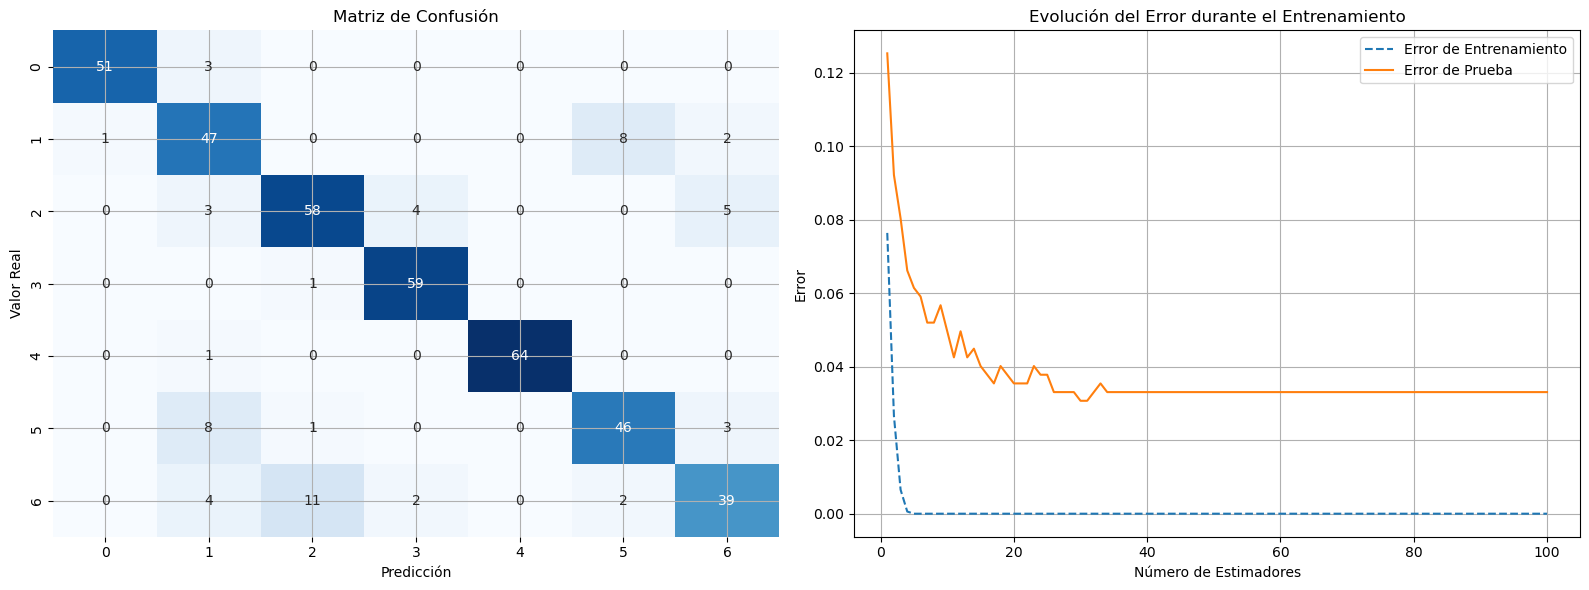

In [37]:
# Preprocesamiento de los datos de entrada
X_train_processed = model_pipeline_GB.named_steps['preprocessor'].transform(x_train)
X_test_processed = model_pipeline_GB.named_steps['preprocessor'].transform(x_test)

# Extraer el modelo GradientBoostingClassifier desde el Pipeline
gb_model = model_pipeline_GB.named_steps['classifier']

# Llamar a la función con los datos preprocesados
grafico_evolucion_entrenamiento(y_test, y_pred, gb_model, X_train_processed, y_train, X_test_processed, y_test)

## Decisión optimización de hiperparametros
Teniendo en cuenta los gráficos observados podemos evidenciar que el número de estimadores óptimos esta entre 30 y 40, mientras que la profundidad de los arboles es buena ya que se evidencia una buena clasificación de la información acorde a la matriz de confusión.  Por otro lado, la taza de aprendizaje podría ser un poco mas baja y así ver si el error disminuye.
Así, los parámetros optimizados serian: n_estimators=35, learning_rate=0.8, max_depth=5, random_state=0 

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.91      0.94        54
      Normal_Weight       0.89      0.95      0.92        58
     Obesity_Type_I       0.99      0.97      0.98        70
    Obesity_Type_II       1.00      1.00      1.00        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.95      0.94        58
Overweight_Level_II       0.97      0.98      0.97        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.97      0.96      0.96       423



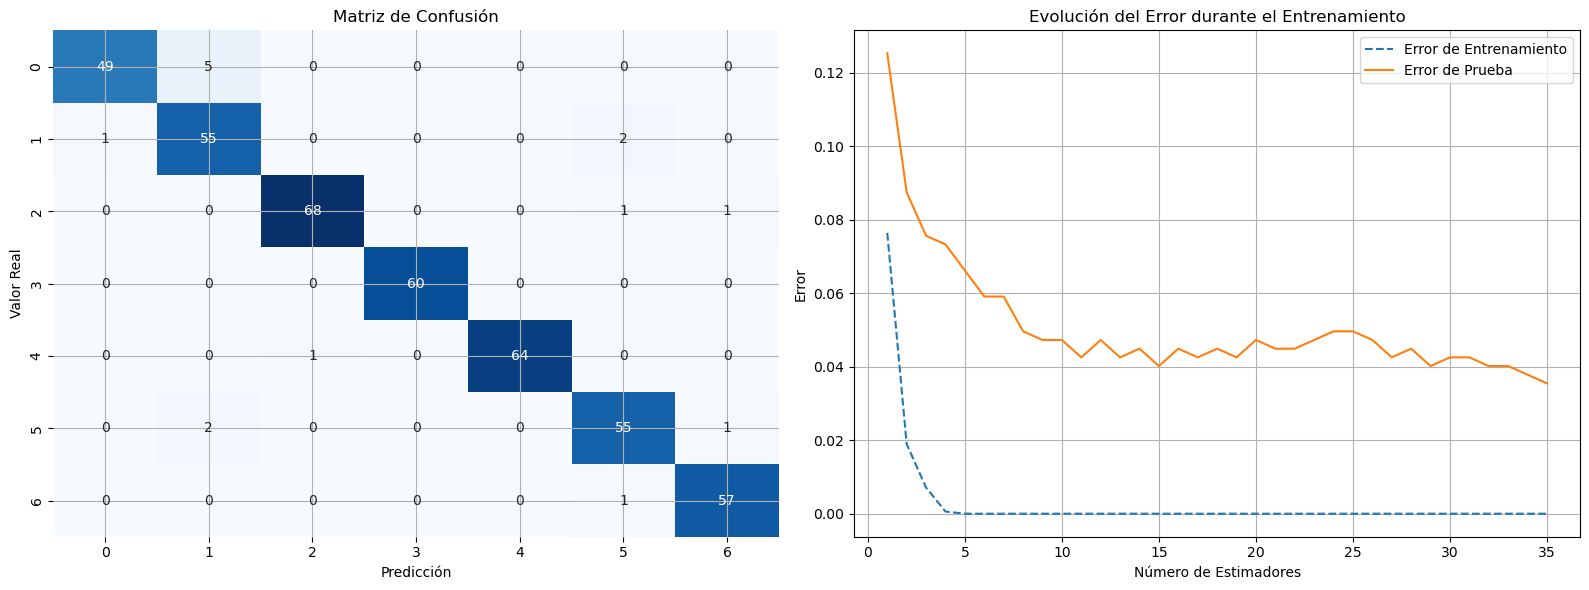

In [39]:
# Creamos un nuevo pipeline que incluye el preprocesamiento y el modelo
model_pipeline_GB_O = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', GradientBoostingClassifier(n_estimators=35, learning_rate=0.8, max_depth=5, random_state=0))])

# Entrenamos el pipeline completo en los datos de entrenamiento
model_pipeline_GB_O.fit(x_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = model_pipeline_GB_O.predict(x_test)

# Evaluamos el rendimiento del modelo
print(classification_report(y_test, y_pred, zero_division='warn'))

# Preprocesamiento de los datos de entrada
X_train_processed = model_pipeline_GB_O.named_steps['preprocessor'].transform(x_train)
X_test_processed = model_pipeline_GB_O.named_steps['preprocessor'].transform(x_test)

# Extraer el modelo GradientBoostingClassifier desde el Pipeline
gb_model = model_pipeline_GB_O.named_steps['classifier']

# Llamar a la función con los datos preprocesados
grafico_evolucion_entrenamiento(y_test, y_pred, gb_model, X_train_processed, y_train, X_test_processed, y_test)

## Conclusión optimización de hiperparametros
Teniendo en cuenta el rendimiento mostrado por la matriz de confusión se concluye que los mejores hiperparametros son los usados en el primer modelo, es decir: n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0

## Visualización de Resultados de Clústeres

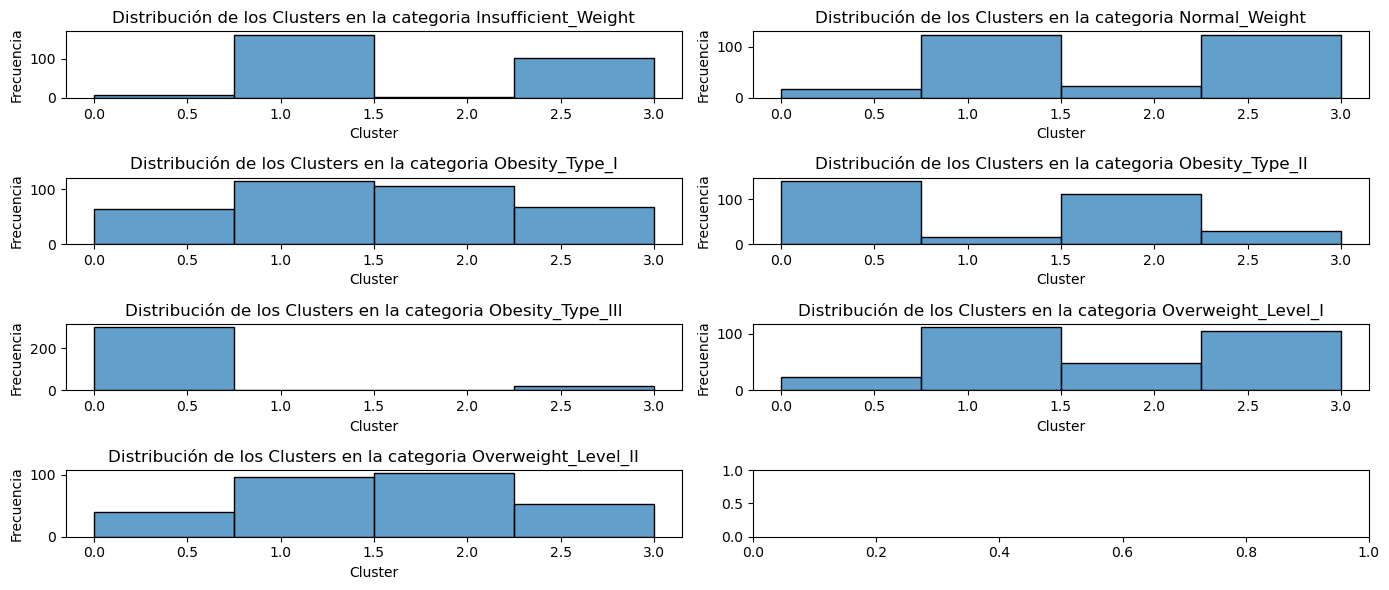

In [42]:
# Crear una figura con dos subgráficas
fig, axes = plt.subplots(4, 2, figsize=(14, 6))

# Gráfico para Insufficient_Weight
sns.histplot(data=df_job[df_job['NObeyesdad'] == 'Insufficient_Weight'], x='Cluster', bins=4, ax = axes [ 0 ,  0 ], alpha=0.7)
axes[ 0 ,  0 ].set_title('Distribución de los Clusters en la categoria Insufficient_Weight')
axes[ 0 ,  0 ].set_xlabel('Cluster')
axes[ 0 ,  0 ].set_ylabel('Frecuencia')

# Gráfico para Normal_Weight
sns.histplot(data=df_job[df_job['NObeyesdad'] == 'Normal_Weight'], x='Cluster', bins=4, ax = axes [ 0 ,  1 ], alpha=0.7)
axes[ 0 ,  1 ].set_title('Distribución de los Clusters en la categoria Normal_Weight')
axes[ 0 ,  1 ].set_xlabel('Cluster')
axes[ 0 ,  1 ].set_ylabel('Frecuencia')

# Gráfico para Obesity_Type_I
sns.histplot(data=df_job[df_job['NObeyesdad'] == 'Obesity_Type_I'], x='Cluster', bins=4, ax = axes [ 1 ,  0 ], alpha=0.7)
axes[ 1 ,  0 ].set_title('Distribución de los Clusters en la categoria Obesity_Type_I')
axes[ 1 ,  0 ].set_xlabel('Cluster')
axes[ 1 ,  0 ].set_ylabel('Frecuencia')

# Gráfico para Obesity_Type_II
sns.histplot(data=df_job[df_job['NObeyesdad'] == 'Obesity_Type_II'], x='Cluster', bins=4, ax = axes [ 1 ,  1 ], alpha=0.7)
axes[ 1 ,  1 ].set_title('Distribución de los Clusters en la categoria Obesity_Type_II')
axes[ 1 ,  1 ].set_xlabel('Cluster')
axes[ 1 ,  1 ].set_ylabel('Frecuencia')

# Gráfico para Obesity_Type_III
sns.histplot(data=df_job[df_job['NObeyesdad'] == 'Obesity_Type_III'], x='Cluster', bins=4, ax = axes [ 2 ,  0 ], alpha=0.7)
axes[ 2 ,  0 ].set_title('Distribución de los Clusters en la categoria Obesity_Type_III')
axes[ 2 ,  0 ].set_xlabel('Cluster')
axes[ 2 ,  0 ].set_ylabel('Frecuencia')

# Gráfico para Overweight_Level_I
sns.histplot(data=df_job[df_job['NObeyesdad'] == 'Overweight_Level_I'], x='Cluster', bins=4, ax = axes [ 2 ,  1 ], alpha=0.7)
axes[ 2 ,  1 ].set_title('Distribución de los Clusters en la categoria Overweight_Level_I')
axes[ 2 ,  1 ].set_xlabel('Cluster')
axes[ 2 ,  1 ].set_ylabel('Frecuencia')

# Gráfico para Overweight_Level_II
sns.histplot(data=df_job[df_job['NObeyesdad'] == 'Overweight_Level_II'], x='Cluster', bins=4, ax = axes [ 3 ,  0 ], alpha=0.7)
axes[ 3 ,  0 ].set_title('Distribución de los Clusters en la categoria Overweight_Level_II')
axes[ 3 ,  0 ].set_xlabel('Cluster')
axes[ 3 ,  0 ].set_ylabel('Frecuencia')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Conclusión visualización de resultados de clusters
Como podemos observar en las gráficas solo para la categoría Obesidad type III se observa una predominancia en alguno de los clusters en esta caso para el cluster 0 y en la categoría de peso insuficiente se puede observar cierta predominancia en el cluster 1. Esto quiere dar a entender que la variable de obesidad no evidencia el reflejo de los patrones natos de los datos.

# Análisis de Interpretabilidad

In [44]:
!pip install shap

In [45]:
!pip install ipython ipywidgets

In [46]:
import shap
shap.initjs()

In [ ]:
# Acceder al modelo final dentro del pipeline
modelo_final = model_pipeline_GB.named_steps['classifier']

# Reducir el conjunto de datos de fondo a 100 muestras aleatorias
background_data = shap.sample(X_train_processed, 50)

# Crear un objeto explainer SHAP
explainer = shap.KernelExplainer(modelo_final.predict_proba, background_data)

# Inicializar SHAP sin widgets interactivos
shap_values = explainer.shap_values(X_test_processed)

# Usar matplotlib para graficar
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names, show=False)
plt.show()

In [ ]:
## Conclusiones análisis de interpretabilidad